In [62]:
import pandas as pan
import numpy as npy
import matplotlib.pyplot as plot
from sklearn.datasets import load_boston
import seaborn as sea 
from sklearn.metrics import r2_score


In [63]:
boston_data = load_boston()

'''Answer for the question 6.(a) number of instances and features'''

print ('Instances = ', boston_data.data.shape[0])
print ('Features = ', boston_data.data.shape[1])

Instances =  506
Features =  13


In [64]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [65]:
boston = pan.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
#Adding the target

boston['MEDV'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


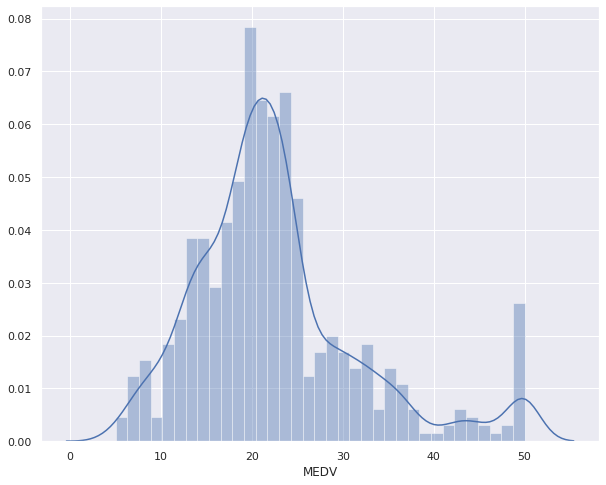

In [67]:
sea.set(rc={'figure.figsize':(10,8)})
sea.distplot(boston['MEDV'], bins=35)
plot.show()

In [68]:
X = boston.iloc[:,:-1].values
Y = boston.iloc[:,-1].values

In [69]:
'''Splitting the data into 80% training set and 20% test set.'''

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [70]:
'''Training the model using all the features'''

from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred = regress.predict(x_test)

print(x_test.shape)
print(y_test.size)
print(y_pred.size)

(102, 13)
102
102


In [72]:
'''
Answering the question 6.(b) reporting the model
by listing the values of slope and intercept
'''

#To get the intercept value:
print('Intercept = ' , regress.intercept_)
#to get the slope:
print('slope = ' ,regress.coef_)

Intercept =  42.93352585337743
slope =  [-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]


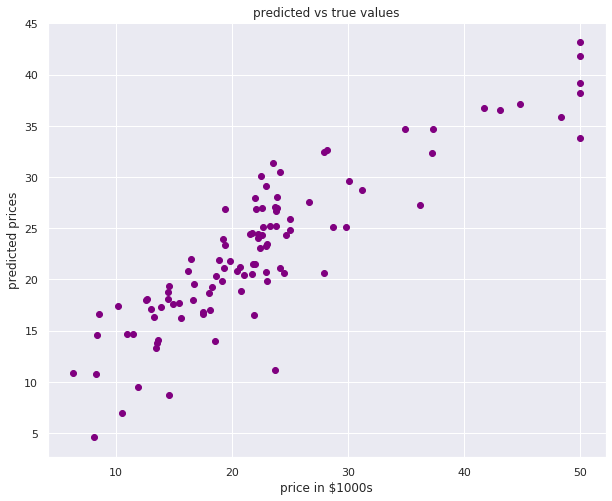

In [73]:
plot.scatter (y_test,y_pred, c = 'purple')
plot.xlabel('price in $1000s')
plot.ylabel('predicted prices')
plot.title('predicted vs true values')
plot.show()

In [74]:
'''
Answering the question 6.(c)
tested the model with the test data and 
listed the metrics root mean squared error and r2_score
'''

from sklearn import metrics
print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, y_pred))
print ('r2_score = ', r2_score(y_test, y_pred))

Mean_Squared_Error: 23.380836480270315
r2_score =  0.7634174432138463


In [75]:
'''
references: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
'''

'\nreferences: https://scikit-learn.org/stable/datasets/index.html#boston-dataset\nhttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html\nhttps://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9\n'